In [1]:
import numpy as np
import cPickle as pkl
from preprocess import build_word_to_idx, build_caption_vectors
from preprocess import preprocess_annotations, get_file_names, get_image_idxs
from utils import decode_captions
from scipy import ndimage
import matplotlib.pyplot as plt
import time 
import h5py
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# load annotations
with open('annotations.pickle', 'rb') as f:
    annotations = pkl.load(f)

In [3]:
# preprocess annoatations
annotations = preprocess_annotations(annotations)

the number of captions before deleting: 414113
the number of captions after deleting: 398782


In [4]:
# build word_to_idx and idx_to_word dictionaries
word_to_idx, idx_to_word, max_len = build_word_to_idx(annotations['caption'], 200)
print "max length of caption(this shoulde be equal to 15): ", max_len

Filtered words from 24766 to 1255
max length of caption(this shoulde be equal to 15):  15


In [5]:
# extract caption vector (or matrix)
train_captions = build_caption_vectors(annotations, word_to_idx, max_len)

success building caption vectors:  (398782, 17)


In [6]:
# get train_file_names
train_file_names, id_to_idx = get_file_names(annotations)
print "train_file_names: ", train_file_names.shape
print "id_to_idx: ", len(id_to_idx)

train_file_names:  (82783,)
id_to_idx:  82783


In [7]:
# get train_image_idxs
train_image_idxs = get_image_idxs(annotations, id_to_idx)
print "train_image_idxs: " ,train_image_idxs.shape

train_image_idxs:  (398782,)


In [8]:
# decode test
decoded = decode_captions(train_captions[0:100], idx_to_word)

caption vector:  [   1  814  328  492 1053  445  958   32 1164  350  348    3    2    0    0
    0    0]
decoded caption:  <START> two people in a food truck one looking at an <UNK> <END>


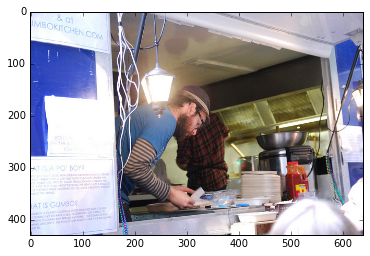

caption vector:  [   1 1053  321  492 1053   97  365  445  849 1053  836    2    0    0    0
    0    0]
decoded caption:  <START> a person in a kitchen preparing food under a lamp <END>


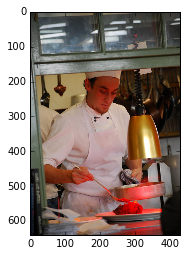

In [9]:
# test
for _ in range(2):
    idx = np.random.randint(0, len(annotations[0:100]))
    print "caption vector: ", train_captions[idx]
    print "decoded caption: ", decoded[idx]
    img_arr = ndimage.imread('./image_data/train2014/'+train_file_names[train_image_idxs[idx]])
    plt.imshow(img_arr)
    plt.show()

In [ ]:
start_t = time.time() 
with h5py.File('data.h5', 'w') as h5file:
    h5file.create_dataset('train_captions', data=train_captions)
    h5file.create_dataset('train_image_idxs', data=train_image_idxs)
    h5file.create_dataset('train_features', data=train_features)
    h5file.create_dataset('train_file_names', data=train_file_names)
end_t = time.time()
print "elapse time: " (end_t - start_t)